**import libraries**

In [37]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

**Load Dataset**

In [38]:
df=pd.read_csv('employee_data.csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# **Data Preprocessing**

In [39]:
df.shape

(15060, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


**Summary Statistics of the data**

In [41]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [42]:
df.describe(include='object').T

,count,unique,top,freq
workclass,15060,7,Private,11021
education,15060,16,HS-grad,4943
maritalstatus,15060,7,Married-civ-spouse,6990
occupation,15060,14,Exec-managerial,1992
relationship,15060,6,Husband,6203
race,15060,5,White,12970
sex,15060,2,Male,10147
native,15060,40,United-States,13788
Salary,15060,2,<=50K,11360


**Missing values in the dataset**

In [43]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# **Data Analysis and Visualization**

**Univariate Analysis**

**count plot**

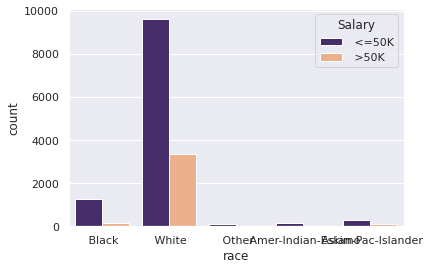

In [44]:
sns.countplot(x="race",data=df,hue='Salary',palette=['#432374',"#FAAE7C"])


Text(0, 0.5, 'count')

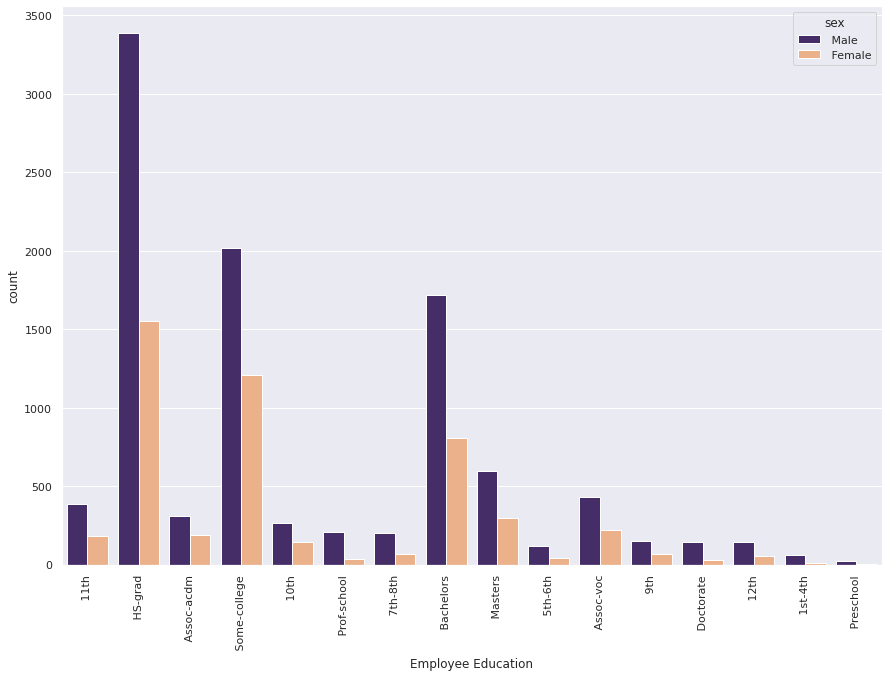

In [45]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
sns.countplot(x="education",data=df,hue='sex',palette=['#432371',"#FAAE7B"])
plt.xticks(rotation=90)
plt.xlabel("Employee Education")
plt.ylabel("count")

**Distribution Plot**

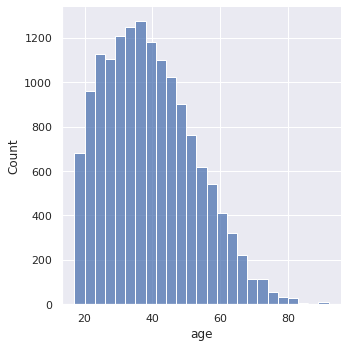

In [46]:

sns.displot(df, x="age",binwidth=3)

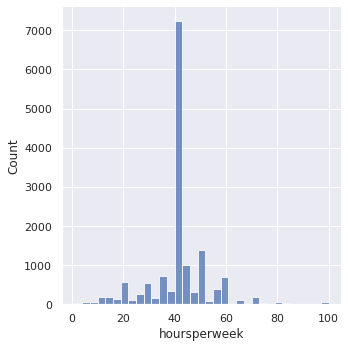

In [47]:
sns.displot(df, x="hoursperweek",binwidth=3)

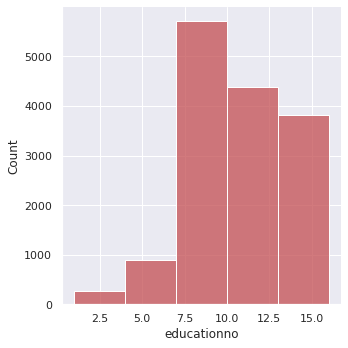

In [48]:
sns.displot(df, x="educationno",binwidth=3,color='r')

**Bivariate Analysis**

**BoxPlot**

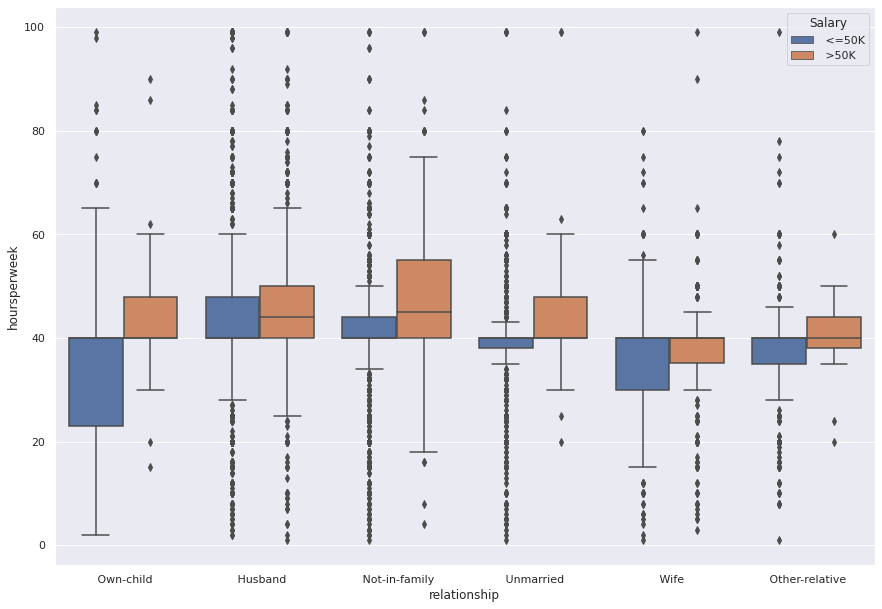

In [49]:
sns.set(rc={'figure.figsize':(14.7,10.27)})
sns.boxplot(x='relationship',y="hoursperweek",data=df,hue='Salary')

**Violin Plot**

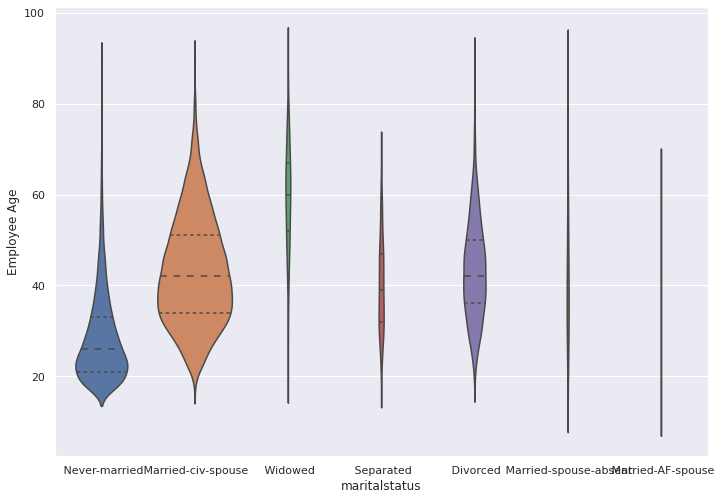

In [50]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x = df.maritalstatus, y = df['age'], data = df, scale = 'count', inner = 'quartile')
plt.ylabel('Employee Age')
plt.show()

**Box Plot**

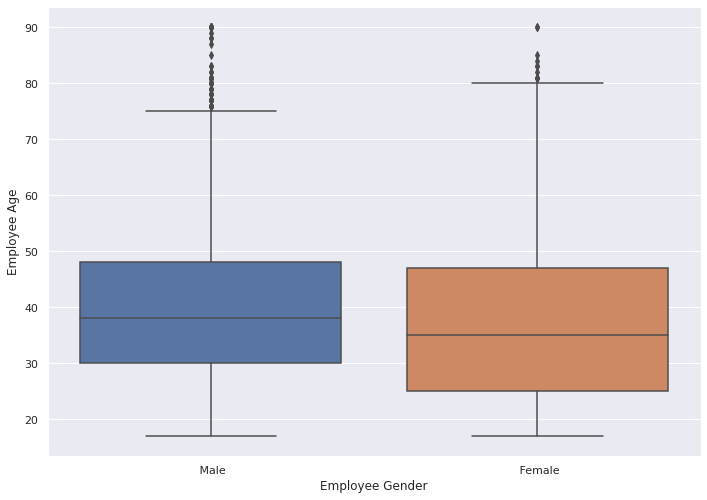

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df.sex, y = df['age'], data = df)
plt.xlabel("Employee Gender")
plt.ylabel('Employee Age')
plt.show()

**Violin Plot**

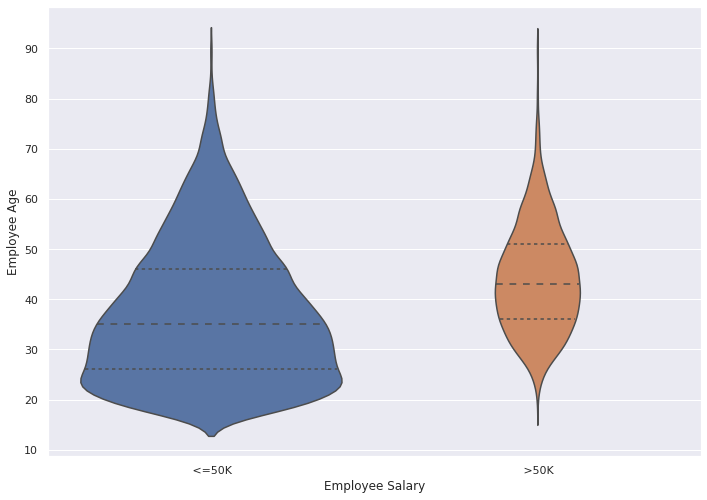

In [52]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x = df.Salary, y = df['age'], data = df, scale = 'count', inner = 'quartile')
plt.xlabel("Employee Salary")
plt.ylabel('Employee Age')
plt.show()

**Box-plot**

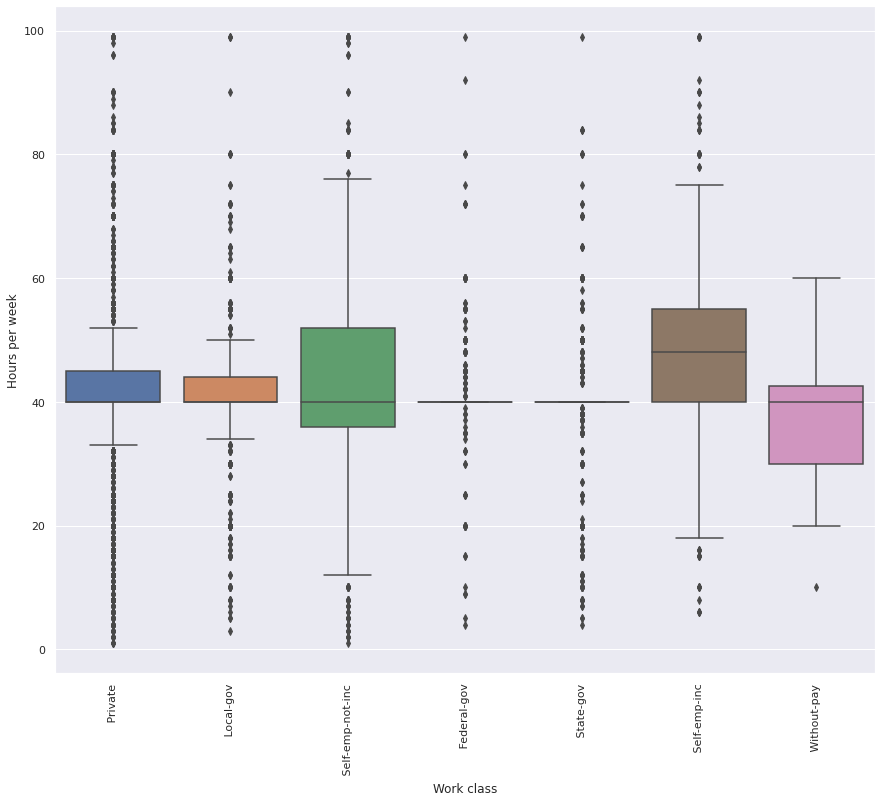

In [53]:
sns.set(rc={'figure.figsize':(14.7,12.27)})
sns.boxplot(x = df.workclass, y = df['hoursperweek'], data = df)
plt.ylabel('Hours per week')
plt.xticks(rotation=90)
plt.xlabel("Work class")
plt.show()

**Barplot**

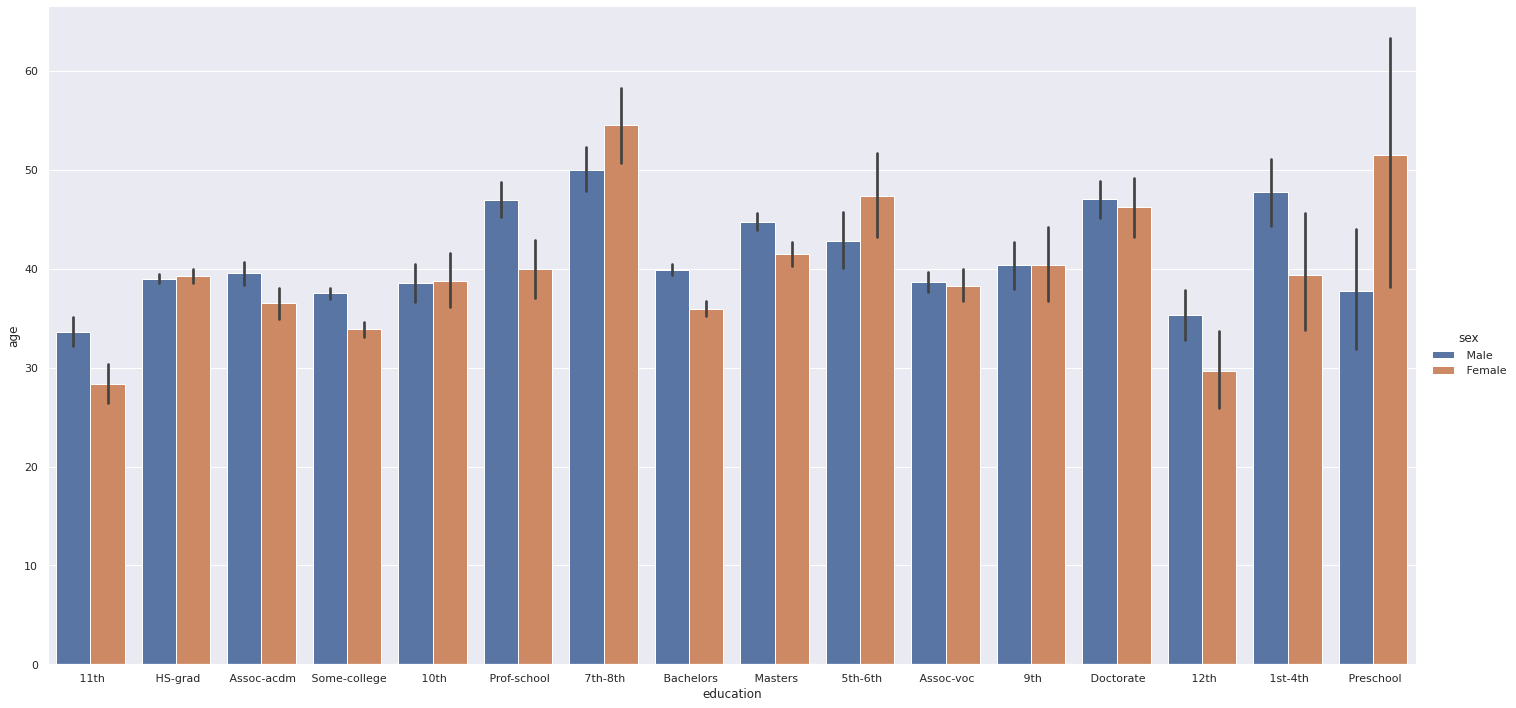

In [54]:

sns.catplot(x="education", y="age", hue="sex", kind="bar", data=df,height=10, aspect=2)


In [55]:
df['Salary']

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

We need to change the data type of columns so  salary>=50k is 1 and salary<50k is 0.

In [56]:
s=df['Salary']
df['salary'] = s.map(lambda x: 1 if x ==" >50K" else 0)
df.drop(['Salary'],axis=1,inplace=True)

In [57]:
df['salary']

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: salary, Length: 15060, dtype: int64

**Handle Categorical features**

In [58]:
df.shape

(15060, 14)

In [59]:
df=df.apply(LabelEncoder().fit_transform)

**Dependent and independent variable**

In [60]:
x=df.drop(['salary'],axis=1)

In [61]:
y=df['salary']

**Train Test split**

In [62]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [63]:
print("the shape of x_train is ",x_train.shape)
print("the shape of x_test is ",x_test.shape)
print("the shape of y_train is ",y_train.shape)
print("the shape of y_test is ",y_test.shape)

the shape of x_train is  (11295, 13)
the shape of x_test is  (3765, 13)
the shape of y_train is  (11295,)
the shape of y_test is  (3765,)


**Naive Bayes Model**

In [64]:

gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

**Predicttion**

In [65]:
pred=gnb.predict(x_test)

**Accuracy**

In [66]:
print("the accuracy of Naive Bayes is ",accuracy_score(y_test,pred))

the accuracy of Naive Bayes is  0.8193891102257637


**Evaluation Metrics**

In [67]:
cm=confusion_matrix(pred,y_test)
class_label = ["Salary less then 50k", "Salary Greater then 50k"]

In [68]:
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
df_cm

,Salary less then 50k,Salary Greater then 50k
Salary less then 50k,2672,469
Salary Greater then 50k,211,413


**Precision Recall and F1 score**

In [69]:
print("The precision of  SVM is ",precision_score(y_test, pred))
print("The recall of  SVM is ",recall_score(y_test, pred))
print("The f1_score of  SVM is ",f1_score(y_test, pred))

The precision of  SVM is  0.6618589743589743
The recall of  SVM is  0.46825396825396826
The f1_score of  SVM is  0.548472775564409


**Confusion Matrix**

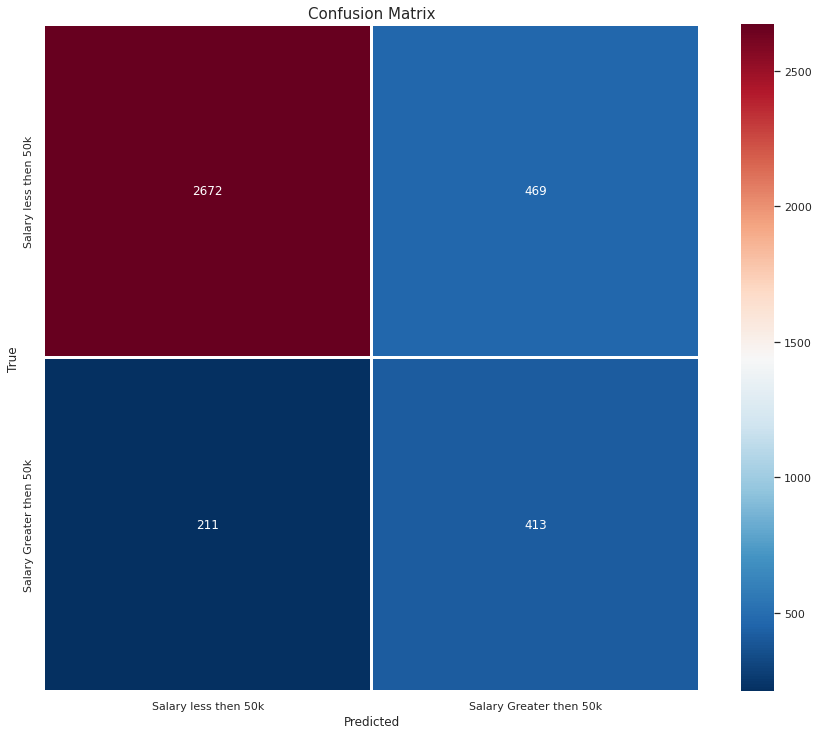

In [70]:
sns.heatmap(df_cm,annot=True,cmap='RdBu_r',linewidths=2,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

**Classification report**

In [71]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2883
           1       0.66      0.47      0.55       882

    accuracy                           0.82      3765
   macro avg       0.76      0.70      0.72      3765
weighted avg       0.81      0.82      0.81      3765

